In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


In [8]:
raw_eqk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   id         120108 non-null  object 
 6   place      120108 non-null  object 
 7   type       120108 non-null  object 
dtypes: float64(4), object(4)
memory usage: 7.3+ MB


In [9]:
#Check which are the unique values for the type of earthquakes.
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

In [14]:
#Select only data with with type equal to ‘eartquake’ and magnitude greater than or equal to 6.5.
eqk = raw_eqk[(raw_eqk.type == 'earthquake') & (raw_eqk.mag >= 6.5)]
eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake
15979,2014-02-07 08:40:13.550,-15.0691,167.3721,122.00,6.5,usc000mjye,"34km E of Port-Olry, Vanuatu",earthquake
17606,2014-02-02 09:26:37.820,-32.9076,-177.8806,44.26,6.5,usc000mfm0,"189km SSE of L'Esperance Rock, New Zealand",earthquake


<AxesSubplot:>

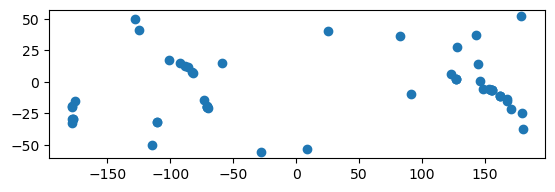

In [16]:
#EPSG:4326
eqk = gpd.GeoDataFrame(eqk,
                       geometry = gpd.points_from_xy(eqk.longitude,eqk.latitude),
                       crs = 'EPSG:4326')

eqk.plot()

In [18]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:title={'center':'Earthquakes of magnitude greater than or equal to 6.5 in 2014'}>

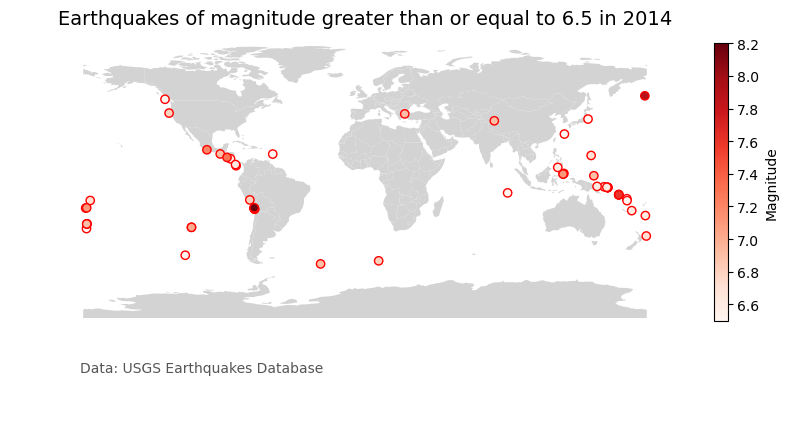

In [50]:
# figsize updates the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# remove the axis box around the map
ax.axis('off')

# update title
ax.set_title('Earthquakes of magnitude greater than or equal to 6.5 in 2014',
fontsize=14)

ax.annotate("Data: USGS Earthquakes Database", 
            xy=(0.08, 0.1), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='#555555')


worldmap.plot(ax=ax,
               color='lightgrey',
               edgecolor = 'none')

eqk.plot(ax=ax,
         column='mag',
         cmap ='Reds',
         edgecolor='red',
         legend=True,
        legend_kwds={'shrink': 0.6, 
                    'label':'Magnitude'})